# 1. Introduction
In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252).

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.



### a. Preview 2 datasets

* The columns in the dataset **dete_survey.csv** are:

|Index|Column name|Description|
|:----|:----|:----|
|0|`ID`|An id used to identify the participant of the survey|
|1|`SeparationType`|The reason why the person's employment ended|
|2|`Cease Date`|The year of month the person's employment ended|
|3|`DETE Start Date`|The year the person began employment with the DETE|

* The columns in the dataset **tafe_survey.csv** are:

|Index|Column name|Description|
|:----|:----|:----|
|0|`Record ID`|An id used to identify the participant of the survey|
|1|`Reason for ceasing employment`|The reason why the person's employment ended|
|2|`LengthofServiceOverall. Overall Length of Service at Institute (in years)`|The length of the person's employment(in years)|




# Importing and Preparing The Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
dete_survey = pd.read_csv("../input/employee-exit-survey/dete_survey.csv", encoding = "Latin1")


tafe_survey = pd.read_csv("../input/employee-exit-survey/tafe_survey.csv", encoding = "Latin1")


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
dete_survey.isna().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

# Cleaning the data

From the above few sells we see:

* The **dete_survey** dataframe contains "Not Stated" values that indicate values are missing, but they are  not represented as NaN.

* Both **dete_survey** and **tafe_survey** dataframes contain many columns that we don't need to evaluate our analysis.

* Each dataframe contains many of the same columns, but the column names are different.

* There are multiple columns that indicate an employee resigned because they were dissastisfied.


To start we will handle the first two issues



In [8]:
missing_values = ["Not Stated"]

# Replacing this missing value with NaN value
dete_survey = pd.read_csv("../input/employee-exit-survey/dete_survey.csv", na_values = missing_values)

In [9]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
# Dropping the irrelevant columns in each dataframe
dete_survey_updated  = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)


Above, we performed some data cleaning steps:
 
* "Not Stated" has been replaced with NaN.

*  Not useful columns were dropped.

# Renaming the Columns

In [11]:
# Renaming column names in dete_survey dataframe
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(" ", "_")

In [12]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
# Renaming some columns in tafe_survey
rename_dict = {"Record ID": "id", "CESSATION YEAR": "cease_date", 
               'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender',
               'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status',
               'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(rename_dict, axis = 1, inplace = True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

# Filter the data

In [14]:
dete_survey_updated["separationtype"].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
tafe_survey_updated["separationtype"].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [16]:
# Choosing only rows with Resignation pattern
pattern = r"Resignation"

containing_pattern = dete_survey_updated["separationtype"].str.contains(pattern, na = False)


In [17]:
containing_pattern.value_counts()

False    511
True     311
Name: separationtype, dtype: int64

In [18]:
dete_resignations = dete_survey_updated[containing_pattern]

In [19]:
dete_resignations["separationtype"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [20]:
containing_pattern = tafe_survey_updated["separationtype"].str.contains(pattern, na = False)
containing_pattern.value_counts()

False    362
True     340
Name: separationtype, dtype: int64

In [21]:
tafe_resignations = tafe_survey_updated[containing_pattern]

In [22]:
tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

# Verify the data

In [23]:
dete_resignations["cease_date"].value_counts(dropna = False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [24]:
dete_resignations["cease_date"].unique()

array(['05/2012', '07/2012', '2012', '2013', '2010', '07/2013', '06/2013',
       '09/2013', '09/2010', '01/2014', '05/2013', '08/2013', '10/2013',
       '12/2013', '11/2013', nan, '07/2006'], dtype=object)

In [25]:
dete_resignations["cease_date"] = dete_resignations["cease_date"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1].astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
dete_resignations["cease_date"].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [28]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending = True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [29]:
tafe_resignations["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

<AxesSubplot:>

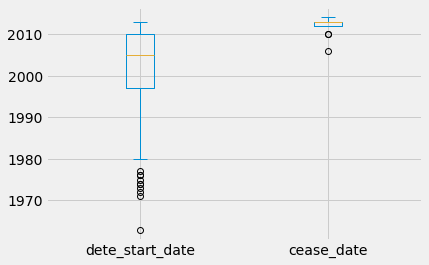

In [30]:
dete_resignations[['dete_start_date','cease_date']].plot(kind='box')


Above, we cleaned the columns of both dataframes which contain the start and cease date of the resigned employees. There do not appear to be any major issues with the values. The span of the cease years for both dataframes is a bit different:

* DETE: 2006 - 2014
* TAFE: 2009 - 2013

* Using **seaborn** to visualize the data and identify quicly outliers and cosidering to remove them

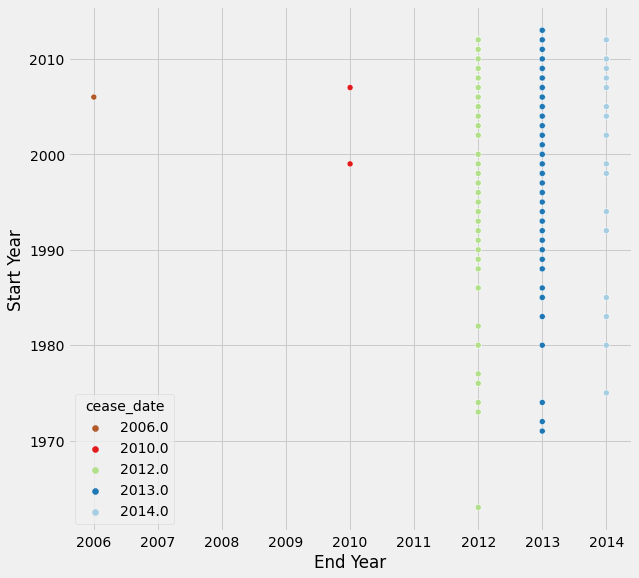

In [31]:
import seaborn as sns

f, ax = plt.subplots(figsize=(9, 9))

sns.scatterplot(data = dete_resignations, x = dete_resignations["cease_date"], y = dete_resignations["dete_start_date"],
               palette = "Paired_r", hue = dete_resignations["cease_date"])
plt.ylabel("Start Year")
plt.xlabel("End Year")
plt.show()

* As we can see, the most old start date is in 1963, and the person stay in the job until 2012. Practically is not a resignation but a retirement.


* We have a case that started in 2006 and resign in 2006.


* Most of the resignations occurred in 2012, 2013 and 2014.


* Is not clear why before 2011 we have low resignations.

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The TAFE dataset contains a column called institute_service. Unfortunately, the DETE dataset does not have such a column. We do, however, have the needed data to create this column. It should contain the difference between the cease_date and the dete_start_date columns.

In [32]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
dete_resignations["institute_service"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

# Identify Dissastisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. TAFE:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

2. DETE:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [34]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [35]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [36]:
correct_dict = {"-": False,  "Contributing Factors. Dissatisfaction ": True}
tafe_resignations["Contributing Factors. Dissatisfaction"] = tafe_resignations["Contributing Factors. Dissatisfaction"].map(correct_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna = False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [38]:
correct_dict = {"-": False,  "Job Dissatisfaction": True}
tafe_resignations["Contributing Factors. Job Dissatisfaction"] = tafe_resignations["Contributing Factors. Job Dissatisfaction"].map(correct_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna = False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [40]:
selected_df = tafe_resignations.loc[:,["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]]
tafe_resignations["dissatisfied"] = selected_df.any(axis = 1, skipna = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
tafe_resignations["dissatisfied"].value_counts(dropna = False)

False    241
True      99
Name: dissatisfied, dtype: int64

In [42]:
dete_diss_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
                     'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
                     'work_life_balance', 'workload']

selected_df = dete_resignations.loc[:, dete_diss_columns]
dete_resignations["dissatisfied"] = selected_df.any(axis = 1, skipna = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
dete_resignations["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [44]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Above, we created a dissatisfied column in both dataframes. The values of the columns are either True or False based on the emplyees' response to the questions in the columns we identified above.

Additionally, we created copies of each dataframe.

# Combining The Data

In [45]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [46]:
# Combining theses dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis = 0, ignore_index = True)

In [47]:
combined.notnull().sum().sort_values(ascending = False)

id                                                     651
dissatisfied                                           651
institute                                              651
separationtype                                         651
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
Institute                                              340
WorkArea                                               340
Contributing Factors. Career Move - Private Sector     332
Contributing Factors. Career Move - Public Sector      332
Contributing Factors. Maternity/Family                 332
Contributing Factors. Career Move - Self-employment    332
Contributing Factors. Ill Health                       3

In [48]:
# Dropping any columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

In [49]:
combined_updated.notnull().sum().sort_values(ascending = False)

id                   651
separationtype       651
dissatisfied         651
institute            651
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
dtype: int64

In the above few cells we did the following:

* created an institute column in each dataset indicating where the employee worked;


* combined the two datasets into a new one called combined;


* removed any columns from the new dataset which had over 500 NaN values. The resulting dataset was assigned to combined_updated.

# Clean the 'institute_service' column

Next we need to clean the institute_service column as it contains values in a couple of different formats. To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company

* Experienced: 3-6 years at a company

* Established: 7-10 years at a company

* Veteran: 11 or more years at a company

In [50]:
combined_updated["institute_service"].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [51]:
combined_updated["institute_service"][318]

'Less than 1 year'

In [52]:
combined_updated["institute_service"][332]

'More than 20 years'

In [53]:
combined_updated["institute_service"][313]

'7-10'

In [54]:
# Change the type of this column to 'str'
combined_updated["institute_service"] = combined_updated["institute_service"].astype('str')
combined_updated["institute_service"] = combined_updated["institute_service"].str.extract(r"(\d+)")
combined_updated["institute_service"] = combined_updated["institute_service"].astype('float')


In [55]:
combined_updated["institute_service"][318]

1.0

In [56]:
combined_updated["institute_service"][332]

20.0

In [57]:
combined_updated["institute_service"][313]

7.0

In [58]:
# Create a function named "career_stage"
def career_stage(element):
    if pd.isnull(element):
        return np.nan
    
    elif element < 3:
        return "New"
    
    elif 3 <= element <= 6:
        return "Experienced"
    
    elif 7 <= element <= 10:
        return "Extablished"
    
    else:
        return "Veteran"

In [59]:
combined_updated["service_cat"] = combined_updated["institute_service"].apply(career_stage)

In [60]:
combined_updated["service_cat"].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Extablished     62
Name: service_cat, dtype: int64

Above, we cleaned the institute_service column. We used the value from that column in order to determine in which category the employee falls. We created a new column - service_cat - where we see the category of the employee.

# Perform Initial Analysis

In [61]:
combined_updated["dissatisfied"].value_counts(dropna = False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [62]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

In [63]:
combined_updated["dissatisfied"].value_counts()

False    403
True     248
Name: dissatisfied, dtype: int64

[]

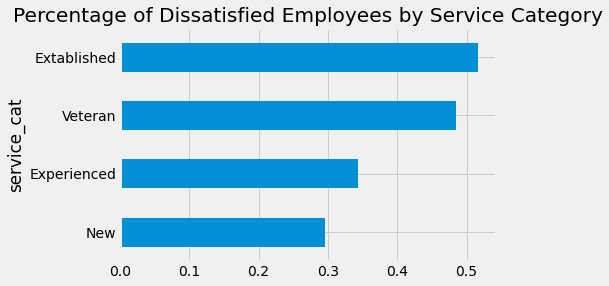

In [64]:
pv_dissastified = combined_updated.pivot_table(index = "service_cat", values = "dissatisfied")
pv_dissastified = pv_dissastified.sort_values(by = ["dissatisfied"])
pv_dissastified.plot(kind = "barh", legend = False, title = "Percentage of Dissatisfied Employees by Service Category") 
plt.plot()

Fom the image above, we can see that:

* Employees who took the two serveys, Established and Veteran emplyees are more likely to resign due to dissatisfaction.

* Only about 30% of the new employees reported a dissastisfaction

It is likely that a new administration want to remove the old personal and give to the new personal more attentions. But it is only a maybe, we need more data to have a conclusion.>

# Dissatisfied By Age

In [65]:
combined_updated["age"].unique()

array(['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60',
       '51-55', '21-25', '26-30', nan, '20 or younger', '41  45',
       '56 or older', '46  50', '36  40', '21  25', '31  35', '26  30'],
      dtype=object)

Below we will clean the age column by grouping the employees in age groups. Afterwards, we will answer the question:

* How many people in each age group resgined due to some kind of dissatisfaction?

In order to clean the data, we will divide the age groups like this:

* 20s
* 30s
* 40s
* 50s
* 60+

In [66]:
combined_updated["age"].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [67]:
# Converting this column into string
combined_updated["age"] = combined_updated["age"].astype('str')

In [68]:
# Create an element-wise function
def age(s):
    if s[0] == '2':
        return '20s'
    elif s[0] == '3':
        return '30s'
    elif s[0] == '4':
        return '40s'
    elif s[0] == '5':
        return '50s'
    elif s[0] == '6':
        return '60s'
    elif s == 'nan':
        return np.nan

In [69]:
combined_updated["age"] = combined_updated["age"].apply(age)

In [70]:
combined_updated["age"].value_counts(dropna = False)

40s    174
20s    139
30s    134
50s    126
NaN     55
60s     23
Name: age, dtype: int64

[]

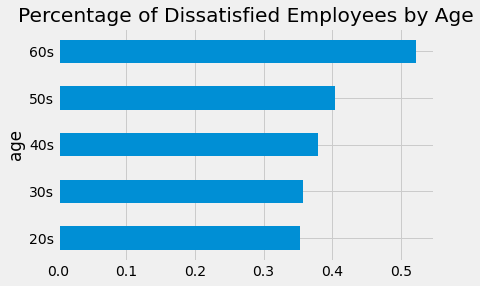

In [71]:
# Using pivot_table to see the percentage of dissatisfied employees based on age 
pivot_dissatisfied = combined_updated.pivot_table(index = "age", values = "dissatisfied")
pivot_dissatisfied = pivot_dissatisfied.sort_values(by = ["dissatisfied"])
pivot_dissatisfied.plot(kind = "barh", legend = False, title = "Percentage of Dissatisfied Employees by Age")
plt.plot()

Conclusion:

* Over 50% of the employees who are in 60s are dissastisfied with there job


* The number of young employees who resigned due to job dissatisfaction is lowest. This might be due to the fact thay they were early in their career development and were still looking for a career path to follow

# Dissatisfied by institute

<AxesSubplot:xlabel='institute'>

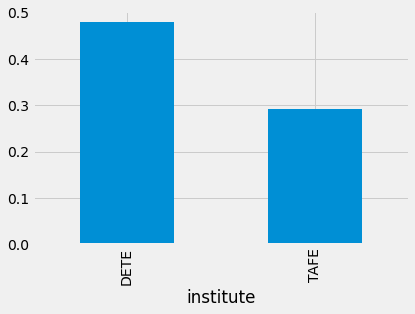

In [72]:
pivot_institute = combined_updated.pivot_table(index = "institute", values = "dissatisfied")
pivot_institute.plot(kind = "bar", legend = False)

It seems that DETE employees have resigned due to job dissatisfaction more often then TAFE employees

# Dissatisfied Employees By Their Position

In [73]:
combined_updated["position"].value_counts(dropna = False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
School Administrative Staff                                  8
Technical Officer                                            8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)

In [74]:
# Calculating the number of dissastisfied employees on each position
dis_position = combined_updated.pivot_table(index = ["position", "service_cat"], values = "dissatisfied", aggfunc = [np.sum])

# Don't forget to reset the index again, seaborn hates to work with the pivot table columns
dis_position.reset_index(inplace = True)

In [75]:
dis_position.columns=['position','service_cat','dissatisfied']
dis_position

,position,service_cat,dissatisfied
0,Administration (AO),Experienced,14
1,Administration (AO),Extablished,3
2,Administration (AO),New,14
3,Administration (AO),Veteran,1
4,Business Service Manager,Veteran,0
...,...,...,...
58,Tutor,Experienced,0
59,Tutor,New,0
60,Workplace Training Officer,Experienced,0
61,Workplace Training Officer,New,0


In [76]:
# Load the pivot table dataset
dis_pos_updated = dis_position[dis_position["dissatisfied"] > 0].sort_values(by = ["dissatisfied"], ascending = False)

                                                             
dis_pos_updated.head(10)

,position,service_cat,dissatisfied
44,Teacher,Veteran,28
47,Teacher (including LVT),New,18
41,Teacher,Experienced,16
0,Administration (AO),Experienced,14
2,Administration (AO),New,14
52,Teacher Aide,Veteran,11
42,Teacher,Extablished,10
48,Teacher (including LVT),Veteran,8
43,Teacher,New,8
45,Teacher (including LVT),Experienced,7


In [77]:
dis_pos_updated["position"].head()

44                    Teacher
47    Teacher (including LVT)
41                    Teacher
0         Administration (AO)
2         Administration (AO)
Name: position, dtype: object

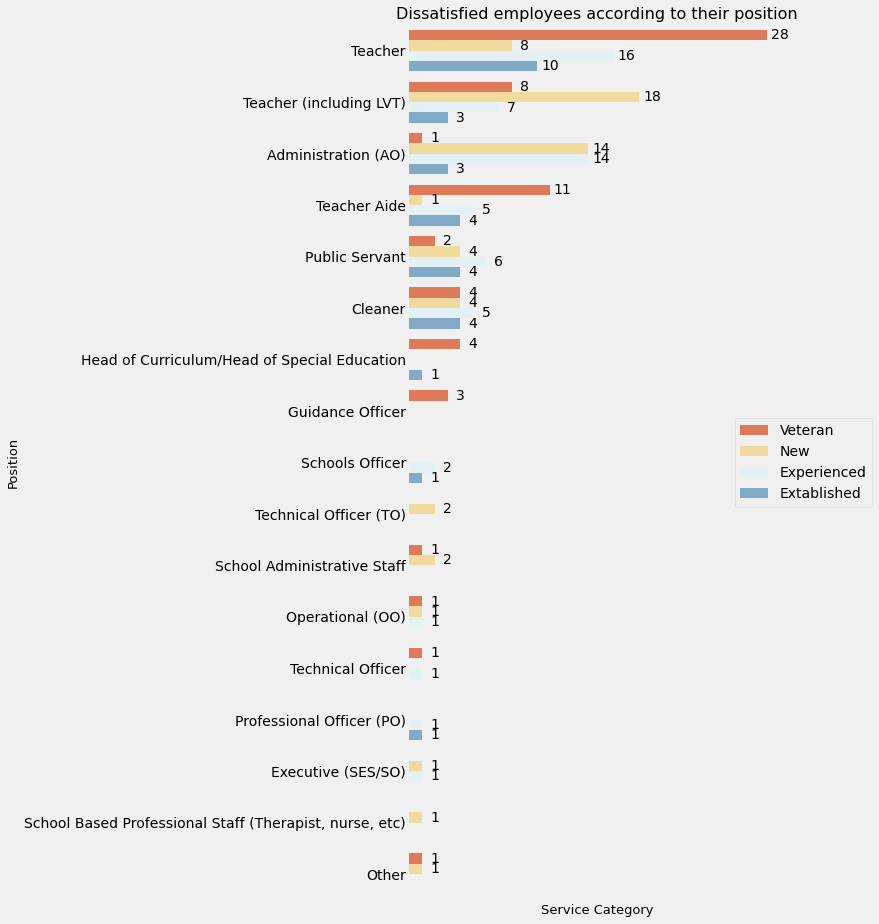

In [78]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(data = dis_pos_updated, x = "dissatisfied", y= "position", hue = "service_cat", palette = "RdYlBu")

# We need to change the position of the names of the columns.
for r in ax.patches:
    if r.get_width() >= 0:
        #In this case we use the width to set the number in the bar
        width = r.get_width()
        # You can play with the numbers below and see what happen...
        plt.text(1+r.get_width(), r.get_y()+0.5*r.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
    else:
        r.get_width() == 0

plt.box(on=None)
plt.xlabel("Service Category", fontsize=13)
plt.ylabel("Position", fontsize=13)
plt.xticks([])
plt.title("Dissatisfied employees according to their position", fontsize=16)
#IMPORTANT: Here you need the box plot, fix it at the center right of the barplot, or the up, as you wish.
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

* Teachers are the most dissatisfied professional. And (as expected) the dissatisfaction is present independent of the years service.

* But (and a big BUT), if most of the employees are teachers obviously you will find more dissatisfaction in this group.

* Anyway, is likely that between teachers the situations that produce dissatisfaction are the same, and the dissatisfaction spread like a disease.

# Conclusion
In this project, we analyzed the exit surveys of employees of the DETE and TAFE institutes. We focused on those who resiged due to some sort of job dissatisfaction and concluded that:

* young, inexperienced employees resigned least often due to job dissatisfaction;

* DETE employees resigned more often due to job dissatisfaction than TAFE employees;

Regarding the position and the dissatisfaction:

* Teachers are the most dissatisfied professional. And (as expected) the dissatisfaction is present independent of the years service.

* But (and a big BUT), if most of the employees are teachers obviously you will find more dissatisfaction in this group.